<a href="https://colab.research.google.com/github/souchem23/data-science-coursework/blob/main/Unit8/SoumikC_FINAL_Unit8ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 8 Exercises: The Art of BART

These exercises are grouped into two parts:

- Questions on the nature of decision trees, random forests, and BART models
- An oppurtunity to practice implementing and analyzing a BART model.

Enjoy!

## Bartian Theory

**Task1**:

Draw a decision tree--on a physical piece of paper--that predicts how many calories you burn in a day, using time you spent exercising that day (in minutes) as a predictor.

To help you understand what you're doing with this tree, seperately create an x/y plot with time exercising as x, and calories burned as y.

If this seems to easy, then add another variable or two (type of exercise?), and/or increase the depth of your tree.

You do not have to show me or turn in your tree to earn credit for this question, although I would like to see your drawing.

Showed Mr. Arredondo in class!

**Task2**:

What is a decision tree? How do they work?

A decision treee is a type of tree data structure. It follows a similar structure of a binary tree, as each node leads to other nodes using binary decisions. Each node has two children node until the final leaf nodes are reached. Basically, decisions are made at each of these nodes. Specifically, in a numerical binary tree, the predictor values are sorted into subsets of the predicted values. We can also think of it as creating a threshold for certain yes/no operations for the binary decision tree.

**Task3**:

What does the "depth" of a decision tree mean?

How do I know if a tree is too deep, or not deep enough?

"Depth" of a decision tree refers to the degree to which the curve fits the data. In this sesne, a greater depth refers to greater pattern fitting. So, if the tree is too deep, it may incorporate too much variation in the data, which was simply just noise in the data. At the same time, the tree may be to shallow if there are very few trends since it woun't capture as many patterns and trends. Effectively, too deep trees are likely to overfit and too shallow trees are likely to underfit.

**Task4:**

How are BART models similar and different from a decision tree?

Both decision trees and BART models implement a tree like structure to trace paths to leaf nodes and make predictions. In a Random Forest (RF), BART actaully used a multitude of deciision trees to makee appropriate predictions. Through "boosting", BART is able to promote diversity among the numerous decision trees by pretty muching all of the decision trees to be unique/different from each other. It is able to do this by purposefuly altering certain decision trees based on other exisiting trees in the random forest. Also, BART models and decision trees both care abut the depth of the trees, but BART takse an extra step to make sure the tree depth si much less than the data points to mitigate overfitting.

**Task5**:

Why would we use a BART model instead of a decision tree?

Decision trees prioritize speed over accuracy, simple based on how they are created. Opposed to BART, decision trees only calculate a pseudo-posterior mean and pseudo-posterior predictive mean, which ignore a lot of the data variation to make a faster running model. As a result, they are more likely to cause overfitting and underfitting. In comparison, BART models prioritize accuracy and ar emuch slower than a singular decision tree becuase they are actually able to capture variance in the data. They even have extra precautions like boosting to reduce underfitting and regularizing priors, MCMC,etc. to negate overfitting.

## Bartian Penguins

In [4]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import seaborn as sns

In [1]:
!pip install pymc-bart

In [2]:
import pymc_bart as pmb

**Task6**:

Create a BART model that uses flipper length, bill depth, and bill length to predict body mass in penguins, and make a ppc to check its fit

Code for loading the data is below. You'll need to do everything else yourself.

Remember to use my notes as a reference, and to copy and paste from them when it makes sense to.

Oh, and try a normal likelihood.

In [6]:
#drop the incomplete rows from the data
url="https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/penguins.csv"
penguins = pd.read_csv(url).dropna()
penguins.head()

,species,island,bill_length,bill_depth,flipper_length,body_mass,sex,year
0,Adelie,Torgersen,3.91,1.87,18.1,3.75,male,2007
1,Adelie,Torgersen,3.95,1.74,18.6,3.80,female,2007
2,Adelie,Torgersen,4.03,1.80,19.5,3.25,female,2007
4,Adelie,Torgersen,3.67,1.93,19.3,3.45,female,2007
5,Adelie,Torgersen,3.93,2.06,19.0,3.65,male,2007


In [7]:
listColumn = ["species", "island", "bill_length", "bill_depth", "flipper_length", "body_mass", "sex", "year"]
peng_stats = penguins.loc[:,listColumn].dropna()
peng_stats.head()

,species,island,bill_length,bill_depth,flipper_length,body_mass,sex,year
0,Adelie,Torgersen,3.91,1.87,18.1,3.75,male,2007
1,Adelie,Torgersen,3.95,1.74,18.6,3.80,female,2007
2,Adelie,Torgersen,4.03,1.80,19.5,3.25,female,2007
4,Adelie,Torgersen,3.67,1.93,19.3,3.45,female,2007
5,Adelie,Torgersen,3.93,2.06,19.0,3.65,male,2007


In [8]:
X = peng_stats[["flipper_length", "bill_depth", "bill_length"]]
Y = peng_stats["body_mass"].to_numpy()

In [11]:
with pm.Model() as penguinModel:
    s = pm.HalfNormal('s', 6)
    μ_ = pmb.BART("μ_", X, np.log(Y), m=50)
    μ = pm.Deterministic("μ",pm.math.exp(μ_))
    y = pm.Normal("y", mu=μ, sigma=s, observed=Y)
    idata_penguin = pm.sample(compute_convergence_checks=False)

Output()

Output()

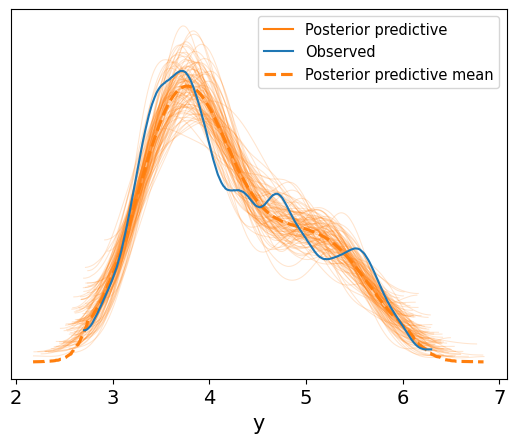

In [12]:
pm.sample_posterior_predictive(idata_penguin,penguinModel, extend_inferencedata=True)
ax = az.plot_ppc(idata_penguin, num_pp_samples=100, colors=["C1", "C0", "C1"])

**Task7**:

Plot flipper length versus body mass,

and then plot the posterior predictve from the model over the data.
You're going to copy paste the plotting code from the notes, fyi.

<Axes: xlabel='flipper_length', ylabel='body_mass'>

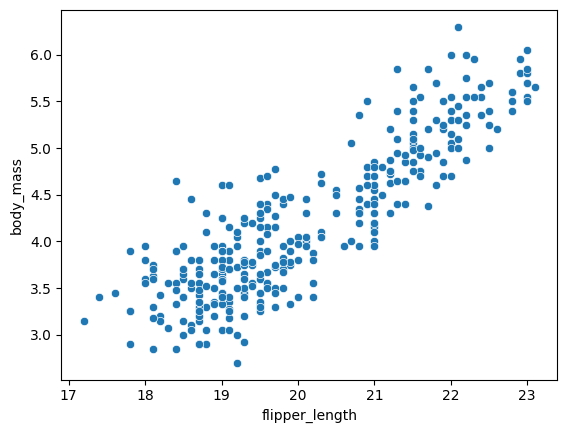

In [13]:
sns.scatterplot(data = peng_stats, y = 'body_mass', x = 'flipper_length')

In [14]:
posterior_mean = idata_penguin.posterior["μ"]

μ_hdi = az.hdi(ary=idata_penguin, group="posterior", var_names=["μ"], hdi_prob=0.74)

pps = az.extract(
    idata_penguin, group="posterior_predictive", var_names=["y"]
).T

/usr/local/lib/python3.11/dist-packages/arviz/plots/hdiplot.py:166: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


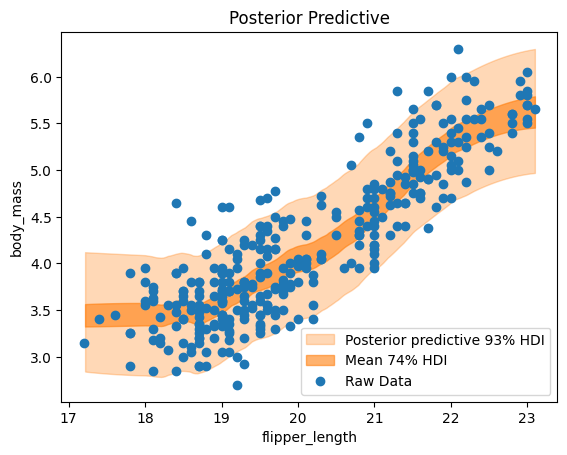

In [15]:
idx = np.argsort(X.to_numpy()[:, 0])
fig, ax = plt.subplots()

az.plot_hdi(
    x=X.to_numpy()[:, 0],
    y=pps,
    ax=ax,
    hdi_prob=0.93,
    fill_kwargs={"alpha": 0.3, "label": r"Posterior predictive 93% HDI"},
)

az.plot_hdi(
    x=X.to_numpy()[:, 0],#grab first row
    y=posterior_mean,
    ax=ax,
    hdi_prob=0.74,
    fill_kwargs={"alpha": 0.6, "label": r"Mean 74% HDI"},
)
ax.plot(peng_stats['flipper_length'], peng_stats["body_mass"], "o", c="C0", label="Raw Data")
ax.legend(loc="lower right")
ax.set(
    title="Posterior Predictive",
    xlabel="flipper_length",
    ylabel="body_mass",
);

**Task8**:

Interpret the plot above in context. Do you think it captures the true association between flipper length and body mass in penguins? Why or why not? Make sure to reference specific things you see in the plot.

Ok, so just glancing the graphs, I belive that it captures the true assocation between flipper length and penguin body mass. Looking at the simple plot, we can observe that the data seems to be increasing upwards and sort of stars to flatten out nearthe end. This end behavior can be observed for just the actual data graph. Moreover, a majority of the data points are clustered in the center, but there are a few data points that are outliers for the rest of the data (both above and below). The PPC mean models this behavior or increasing and flattening out wards the end. Additionally, the PPC mean line is concentrated on the center of the data, without looking too much at the ouliers and avoiding overfitting.

**Task9**:

Create partial depnedence plots (pdps), individual conditional expectation (ice) plots, and a variable importance plot for the BARTpenguin model.

array([<Axes: xlabel='flipper_length'>, <Axes: xlabel='bill_depth'>,
       <Axes: xlabel='bill_length'>], dtype=object)

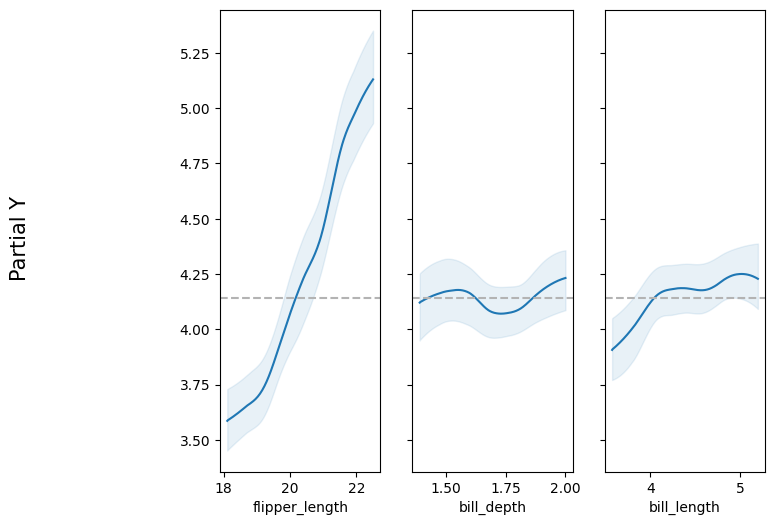

In [16]:
pmb.plot_pdp(μ_, X, Y, grid=(1, 5), func=np.exp, figsize = (12,6))

array([<Axes: xlabel='flipper_length'>, <Axes: xlabel='bill_depth'>,
       <Axes: xlabel='bill_length'>], dtype=object)

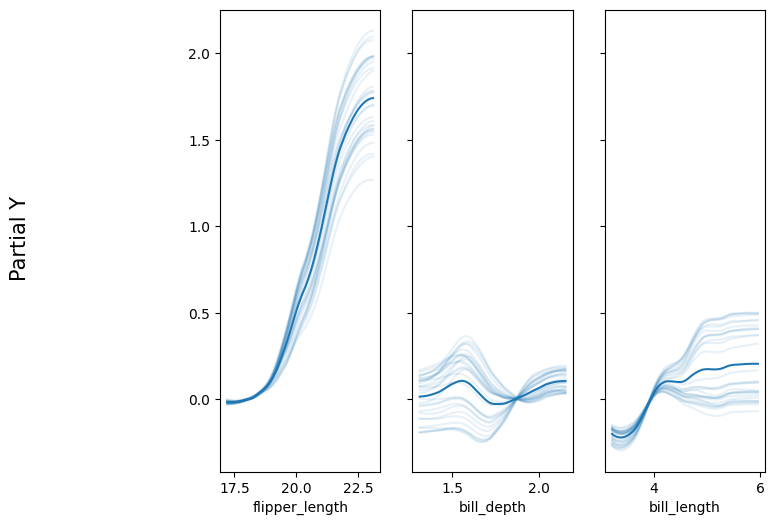

In [17]:
pmb.plot_ice( μ_, X, Y, grid=(1, 5), func=np.exp, figsize = (12,6))

<Axes: ylabel='R²'>

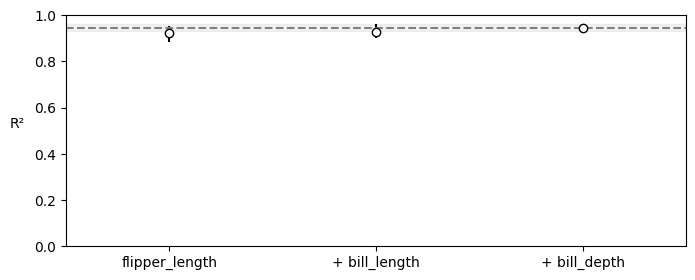

In [19]:
vi_counties = pmb.compute_variable_importance(idata_penguin, μ_, X)
pmb.plot_variable_importance(vi_counties)

**Task10**:

Using the above plots, make an argument about which variable(s) is/are most important in predicting body mass in penguins.

What is the relationship for each variable to body mass, when you take the other variables into account?

Is that relationship complicated by interactions between variables? How do you know?

Make sure to reference specific things you see in each plot, to justify your decisions and comments.

I believe that the flipper_length variable is the most important in predicting body mass in penguins. If we take a look at the partial dependence graphs, we can see that the flipper_length variable has an obvious linear correlation compared to the other two variables which don't have a linear correlation (wavy graph). For this reason, we can see that flipper-length varaible has a strong correlation. Now, if we turn our attention to the variable independent plot, we can observe that adding the bill_length and bill_depth pretty much makes no difference to the r^2 value. This follows that the flipper_length contributes a very large majority of the r^2, raising it to close to 1. This same trend can be observed when looking at the ICE and PDP plots, showing how flipper_length is the most important feature. Going more in depth into the ICE plot, we can observe how there is large variance in the ICE plot, indicating that the flipper_length has some interactions. Similarly, bill_depth and bill_length have interactions either with one or more variables. We can't actually say which one's for sure; we would likley have to go to a linear model to determine which ones are interacting with other variables. This can be observed on the ICE graph because there are several non-parallel lines which show their interaction compared to the near parallel lines of flipper_length in the ICE plot. So, bill_depth and bill_length have a stronger interactions. In general, the flipper_lenth is the strongest predictor of body mass due to the weak influence of other predictors.